In [21]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'gutenberg-tm', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made']


# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def debate_word_dictionary_generator (URL, URL2, name1, name2, name3, modList):
    # first get the web page
    r = requests .get(URL)
    r2 = requests .get(URL2)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    t2 = cleanHtml (r2. text). lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t) + re. split('\s+', t2)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    name3Arr = []
    switcher = 4
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
        
        elif wds[i] == name3:
            switcher = 3
            
        elif wds[i] in modList:
            switcher = 4
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
                
            elif switcher == 3:
                name3Arr.append(wds[i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    wf3 = Counter (name3Arr)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf1. pop(k, None)
        wf2. pop(k, None)
        wf3. pop(k, None)
           
        
    #how many regular words in the document?
    tw1 = 0
    for w in wf1:
       tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
       tw2 += wf2[w] 
    
    tw3 = 0
    for w in wf3:
       tw3 += wf3[w] 
    
    # Get ordered list
    wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    ml1 = min(len(wfs1),30)
    
    wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    ml2 = min(len(wfs2),30)
    
    wfs3 = sorted (wf3 .items(), key = operator.itemgetter(1), reverse=True)
    ml3 = min(len(wfs3),30)
    

    #Reverse the list because barh plots items from the bottom
    return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2), (wfs3 [ 0:ml3 ] [::-1], tw3)]
        
# Now populate two lists    
debateArr = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-11-1992-first-half-debate-transcript/','https://www.debates.org/voter-education/debate-transcripts/october-11-1992-second-half-debate-transcript/',  "clinton:", "bush:", "perot:", ['lehrer:', 'compton:', 'sander vanocur:', 'vanocur:', 'mashek:'])
debateArr2 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-15-1992-first-half-debate-transcript/','https://www.debates.org/voter-education/debate-transcripts/october-11-1992-second-half-debate-transcript/',  "clinton:", "bush:", "perot:", ['carole simpson:', 'audience question:', 'simpson:'])


print(debateArr[0][0])
print(debateArr[1][0])
print(debateArr[2][0])

print(debateArr2[0][0])
print(debateArr2[1][0])
print(debateArr2[2][0])

[('i’ve', 10), ('america', 11), ('values', 11), ('want', 11), ('say', 11), ('like', 12), ('new', 12), ('president', 12), ('control', 13), ('going', 13), ('family', 14), ('costs', 14), ('world', 14), ('jobs', 14), ('plan', 15), ('first', 15), ('change', 15), ('need', 17), ('health', 18), ('american', 18), ('tax', 18), ('care', 19), ('country', 19), ('bush', 19), ('think', 20), ('years', 20), ('october', 41), ('people', 46), ('transcript', 49), ('debate', 56)]
[('right', 10), ('spending', 11), ('us', 11), ('put', 11), ('make', 11), ('war', 11), ('little', 11), ('country', 12), ('know', 12), ('change', 12), ('world', 12), ('i’ve', 13), ('much', 13), ('we’ve', 14), ('tax', 15), ('way', 15), ('believe', 16), ('go', 16), ('that’s', 17), ('got', 18), ('need', 18), ('american', 19), ('i’m', 20), ('it’s', 22), ('say', 22), ('people', 23), ('get', 24), ('we’re', 35), ('going', 36), ('think', 46)]
[('industries', 9), ('job', 9), ('us', 9), ('i’m', 9), ('years', 9), ('things', 9), ('together', 9),

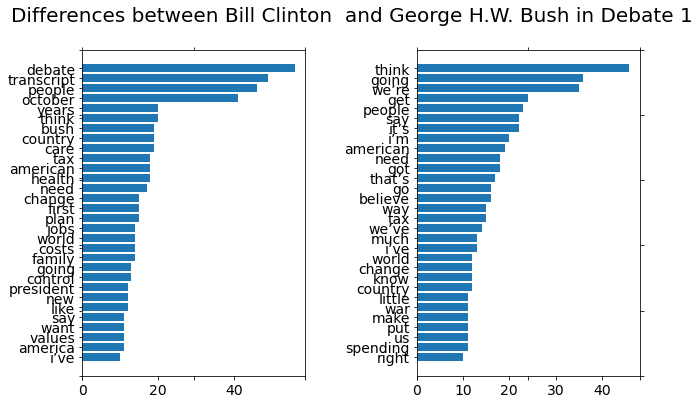

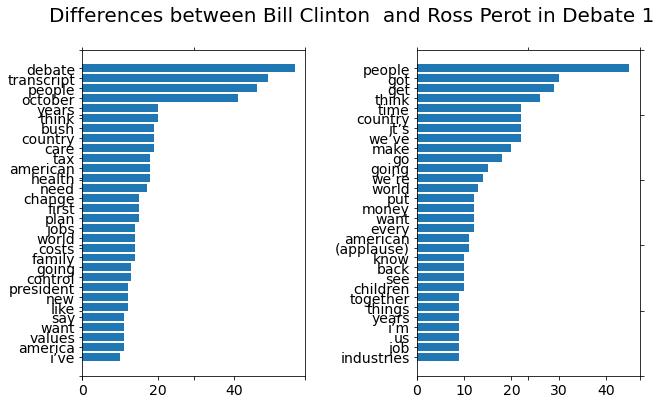

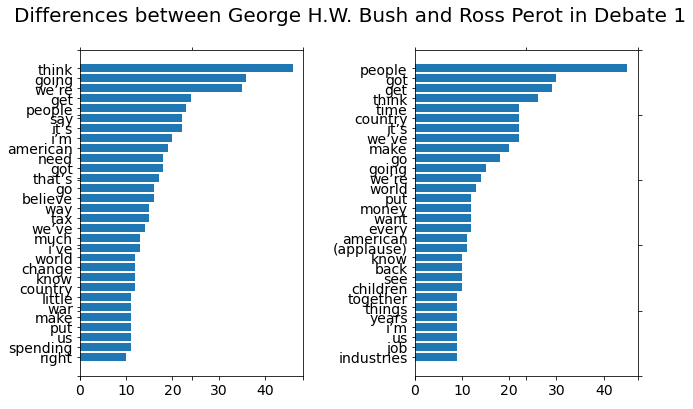

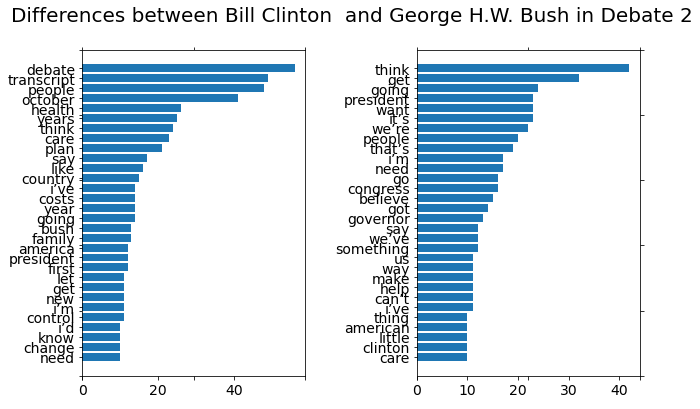

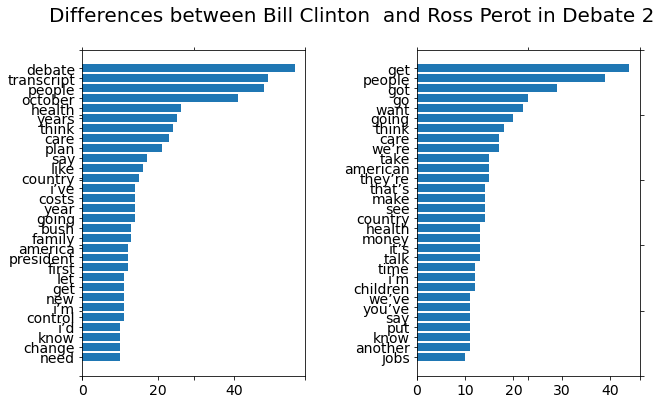

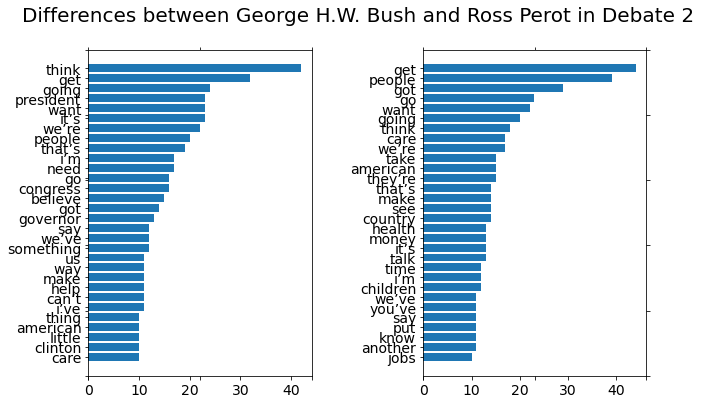

In [22]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')
    


plotTwoLists (debateArr[0][0], debateArr[1][0], 'Differences between Bill Clinton  and George H.W. Bush in Debate 1')
plotTwoLists (debateArr[0][0], debateArr[2][0], 'Differences between Bill Clinton  and Ross Perot in Debate 1')
plotTwoLists (debateArr[1][0], debateArr[2][0], 'Differences between George H.W. Bush and Ross Perot in Debate 1')

plotTwoLists (debateArr2[0][0], debateArr2[1][0], 'Differences between Bill Clinton  and George H.W. Bush in Debate 2')
plotTwoLists (debateArr2[0][0], debateArr2[2][0], 'Differences between Bill Clinton  and Ross Perot in Debate 2')
plotTwoLists (debateArr2[1][0], debateArr2[2][0], 'Differences between George H.W. Bush and Ross Perot in Debate 2')

<h3>Additional Analyses</h3>

<p>I wanted to see if the average word length of a candidate would correlate with who would win certain elections.</p>

In [7]:
import nltk 
nltk.download('vader_lexicon') # one time only
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() # or whatever you want to call it

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mwermert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

def debate_word_list (URL, name1, name2, name3, modList):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    name3Arr = []
    switcher = 4
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
        
        elif wds[i] == name3:
            switcher = 3
            
        elif wds[i] in modList:
            switcher = 4
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
            
            elif switcher == 3:
                name3Arr.append(wds[i])
                
                
    return [name1Arr, name2Arr, name3Arr]
                
debateArrSent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-11-1992-first-half-debate-transcript/',  "clinton:", "bush:", "perot:", ['lehrer:', 'compton:', 'sander vanocur:', 'vanocur:', 'mashek:'])
debateArr2Sent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-11-1992-second-half-debate-transcript/',  "clinton:", "bush:", "perot:", ['lehrer:', 'compton:', 'sander vanocur:', 'vanocur:', 'mashek:'])
debateArr3Sent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-15-1992-first-half-debate-transcript/',  "clinton:", "bush:", "perot:", ['carole simpson:', 'audience question:', 'simpson:'])
debateArr4Sent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-11-1992-second-half-debate-transcript/',  "clinton:", "bush:", "perot:", ['carole simpson:', 'audience question:', 'simpson:'])




cand1_arr = debateArrSent[0] + debateArr2Sent[0] + debateArr3Sent[0] + debateArr4Sent[0]
cand2_arr = debateArrSent[1] + debateArr2Sent[1] + debateArr3Sent[1] + debateArr4Sent[1]
cand3_arr = debateArrSent[2] + debateArr2Sent[2] + debateArr3Sent[1] + debateArr4Sent[1]

out_str = " "

sent1 = vader.polarity_scores(out_str.join(cand1_arr))
sent2 = vader.polarity_scores(out_str.join(cand2_arr))
sent3 = vader.polarity_scores(out_str.join(cand3_arr))

print('Clinton')
print(sent1)
print('Bush')
print(sent2)
print('Perot')
print(sent3)

Clinton
{'neg': 0.096, 'neu': 0.767, 'pos': 0.136, 'compound': 0.9999}
Bush
{'neg': 0.08, 'neu': 0.781, 'pos': 0.14, 'compound': 1.0}
Perot
{'neg': 0.084, 'neu': 0.777, 'pos': 0.138, 'compound': 1.0}


In [11]:
count = 0
total = 0
for word in cand1_arr:
    total += len(word)
    count += 1
    
print('Clinton: ' + str(float(total/count)))

count = 0
total = 0
for word in cand2_arr:
    total += len(word)
    count += 1
    
    
print('Bush: ' + str(float(total/count)))

count = 0
total = 0
for word in cand3_arr:
    total += len(word)
    count += 1
    
    
print('Perot: ' + str(float(total/count)))

Clinton: 4.3921881651766705
Bush: 4.278276304112021
Perot: 4.282936918304033
